In [1]:
import sys
from pathlib import Path
sys.path.append('/home/ahabis/2-Scribble_project')
from config import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from uncertainty_metrics import *
from iteration_correction import *
import pandas as pd
import scipy as sp


In [2]:
# Generate uncertainty measurements of the model predictions and f score
image_list = os.listdir(path_prediction_features)
normalized_stds = np.zeros(len(image_list))
normalized_entropies = np.zeros(len(image_list))
normalized_binary_ratios = np.zeros(len(image_list))
images_f_scores = np.zeros(len(image_list))


for i, image in enumerate(image_list):

    current_image_prediction_path = os.path.join(path_prediction_features, image, 'predictions.npy')
    current_image_trues_path = os.path.join(path_prediction_features, image, 'trues.npy')
    trues = np.load(current_image_trues_path)

    mc_predictions = np.squeeze(np.load(current_image_prediction_path))
    
    # STDs
    normalized_stds[i] = compute_std(mc_predictions,
                                     patch_level=False)
    # Entropy
    normalized_entropies[i] = compute_entropy(mc_predictions,
                                              patch_level=False)
    #F1 Scores
    f1 = metrics(np.mean(mc_predictions,0),trues)[3]
    images_f_scores[i] = f1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


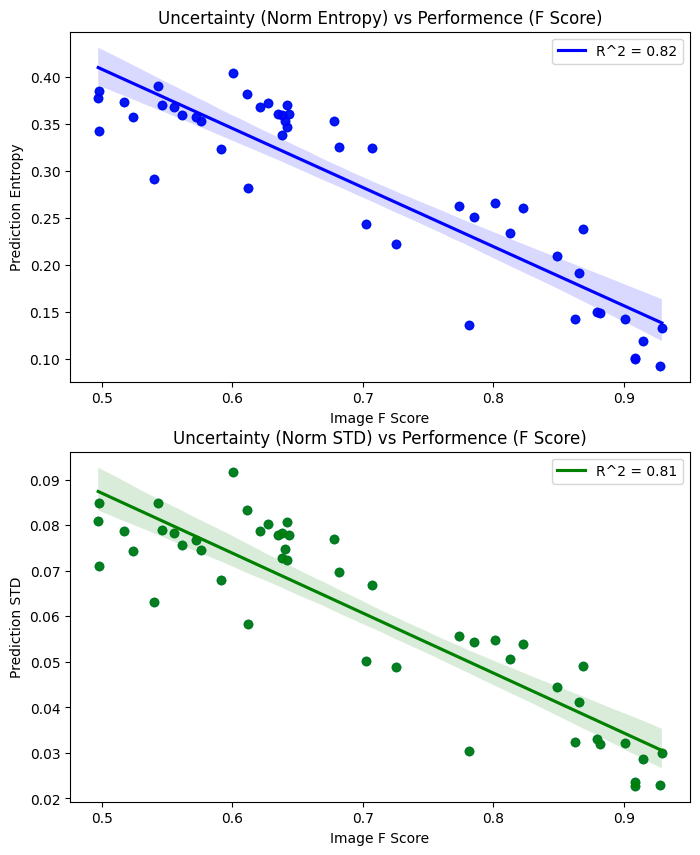

In [3]:
# plot the uncertainty as a function of the prediction quality
x1 = images_f_scores
y1 = normalized_entropies
y2 = normalized_stds
f, axs = plt.subplots(2, 1, figsize=(8,10))

plt.subplot(2, 1, 1)
plt.scatter(x1, y1)
plt.xlabel("Image F Score")
plt.ylabel("Prediction Entropy")
plt.title('Uncertainty (Norm Entropy) vs Performence (F Score)')
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
ax1 = sns.regplot(x1, y1, color='b', 
 line_kws={'label':"R^2 = {}".format(np.round(r_value**2,2))}, )
ax1.legend()

plt.subplot(2, 1, 2)
plt.scatter(x1, y2)
plt.xlabel("Image F Score")
plt.ylabel("Prediction STD")
plt.title('Uncertainty (Norm STD) vs Performence (F Score)')
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x1,y2)
ax2 = sns.regplot(x1, y2, color='g', 
 line_kws={'label':"R^2 = {}".format(np.round(r_value2**2,2))}, )
plt.annotate("r-squared = ", xy=(0.5,0.5))
ax2.legend()
plt.show()

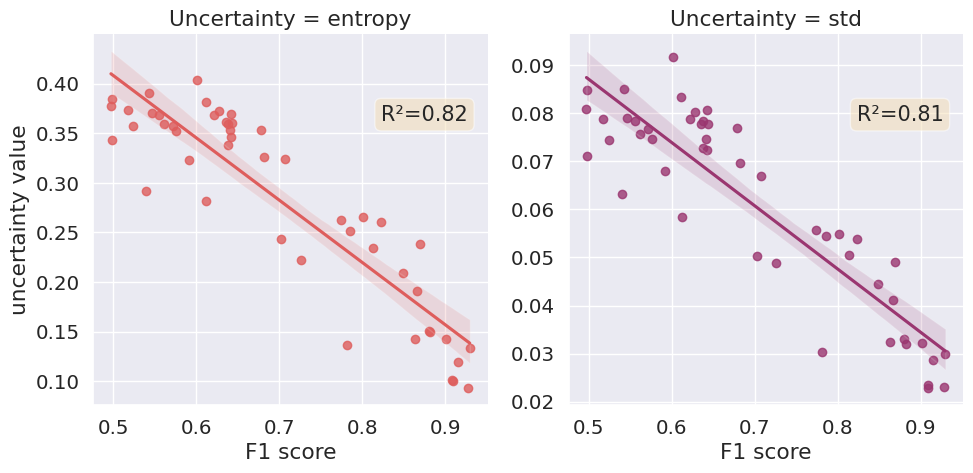

In [67]:
uncertainty = np.concatenate(
    [np.repeat("entropy", x1.shape[0]), np.repeat("std", x1.shape[0])]
)
value_uncertainty = np.concatenate([y1, y2])
f_score = np.concatenate([x1, x1])
dataframe = pd.DataFrame(columns=["F1 score", "uncertainty value", "Uncertainty"])
dataframe["F1 score"] = f_score
dataframe["Uncertainty"] = uncertainty
dataframe["uncertainty value"] = value_uncertainty
sns.set_style("whitegrid")
sns.set(font_scale=1.3)

g = sns.lmplot(
    data=dataframe,
    x="F1 score",
    y="uncertainty value",
    hue = 'Uncertainty',
    col="Uncertainty",
    facet_kws=dict(sharex=True, sharey=False),
    palette = "flare",

)
ax = g.fig.axes[0]
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax.text(0.73, 0.81, 'R²=0.82', transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
ax = g.fig.axes[1]

ax.text(0.73, 0.81, 'R²=0.81', transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
plt.show()